<a href="https://colab.research.google.com/github/Sudhanshu-Ambastha/Multiple-Disease-Prediction-Bot/blob/main/Multiple_Disease_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
from statistics import mode as st_mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

%matplotlib inline

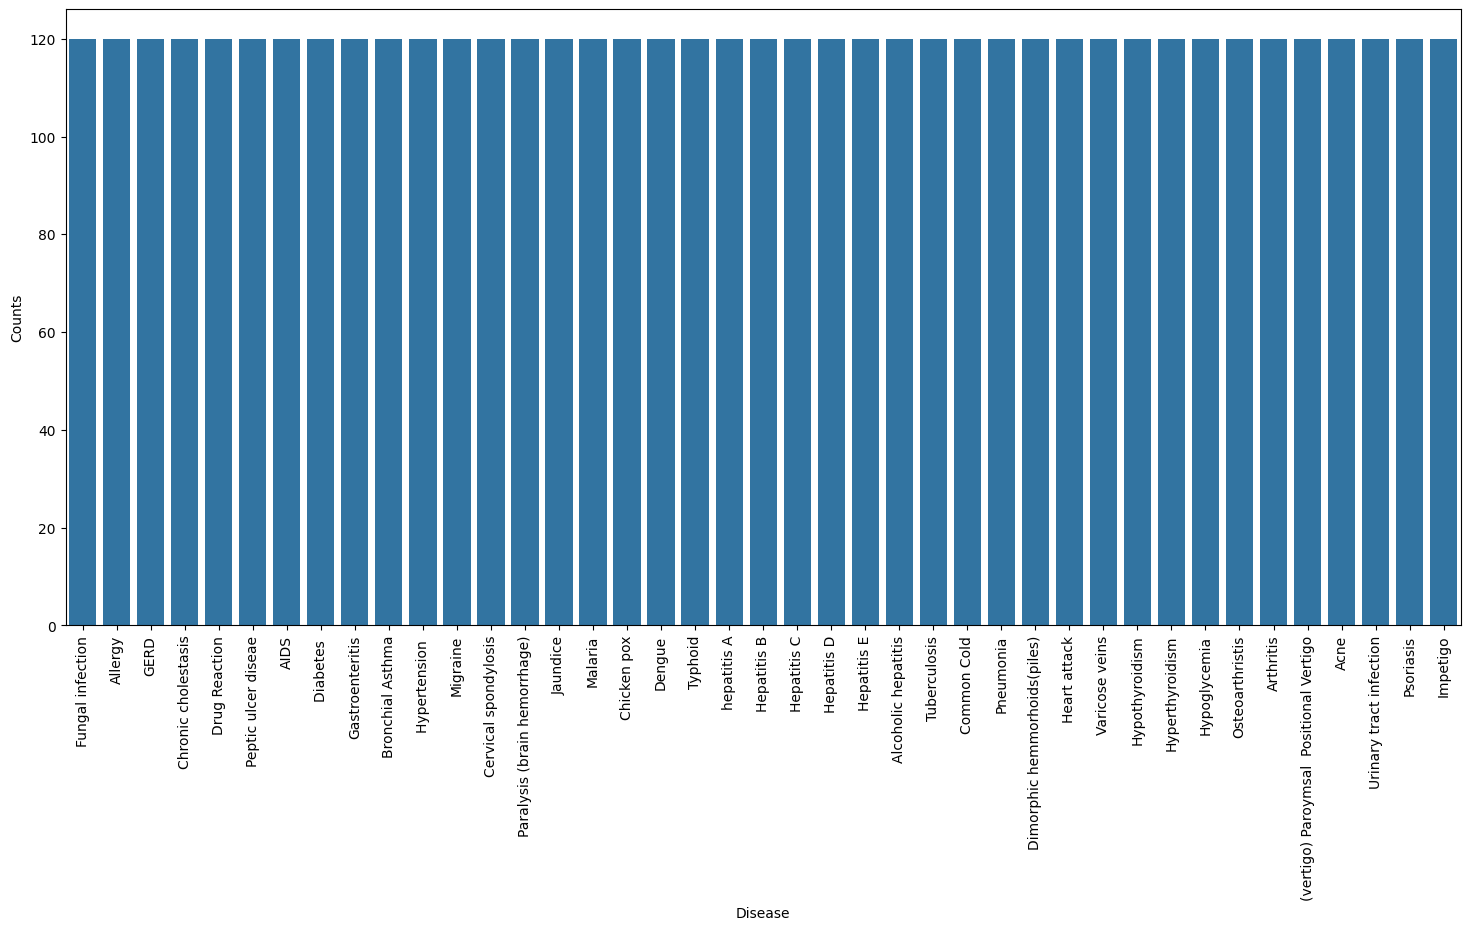

In [10]:
# Reading the train.csv by removing the
# last column since it's an empty column
DATA_PATH = "./Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis=1)

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
	"Disease": disease_counts.index,
	"Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [11]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

In [12]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [13]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
	return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
    "SVC": SVC(probability=True),  # Enable probability for voting
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18),
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(random_state=18, solver='liblinear')),
    "Decision Tree": DecisionTreeClassifier(random_state=18),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=18),
    "AdaBoost": AdaBoostClassifier(random_state=18)
}

# Producing cross validation score for the models
print("\nCross-Validation Scores:")
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X_train, y_train, cv=10,
                             n_jobs=-1,
                             scoring=cv_scoring)
    print("==" * 30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores):.4f}")

print("==" * 30)


Cross-Validation Scores:
SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0000
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0000
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0000
Logistic Regression
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0000
Decision Tree
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0000
K-Nearest Neighbors
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0000
Gradient Boosting
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0000
AdaBoost
Scores: [0.07360406 0.08883249 0.07106599 0.09390863 0.15482234 0.0786802
 0.06870229 0.11450382 0.13994911 0.11704835]
Mean Score: 0.1001


In [14]:
# Training the final models on the entire training data
final_svm_model = SVC(probability=True).fit(X, y)
final_svm_model.fit(X_train, y_train)
svm_preds = final_svm_model.predict(X_test)
print("svm_preds:", svm_preds[:5])

final_nb_model = GaussianNB().fit(X, y)
final_nb_model.fit(X_train, y_train)
nb_preds = final_nb_model.predict(X_test)
print("nb_preds:", nb_preds[:5])

final_rf_model = RandomForestClassifier(random_state=18).fit(X, y)
final_rf_model.fit(X_train, y_train)
rf_preds = final_rf_model.predict(X_test)
print("rf_preds:", rf_preds[:5])

final_lr_model = OneVsRestClassifier(LogisticRegression(random_state=18, solver='liblinear'))
final_lr_model.fit(X_train, y_train)
lr_preds = final_lr_model.predict(X_test)
print("lr_preds:", lr_preds[:5])

final_dt_model = DecisionTreeClassifier(random_state=18).fit(X, y)
final_dt_model.fit(X_train, y_train)
dt_preds = final_dt_model.predict(X_test)
print("dt_preds:", dt_preds[:5])

final_knn_model = KNeighborsClassifier().fit(X, y)
final_knn_model.fit(X_train, y_train)
knn_preds = final_knn_model.predict(X_test)
print("knn_preds:", knn_preds[:5])

final_gb_model = GradientBoostingClassifier(random_state=18).fit(X, y)
final_gb_model.fit(X_train, y_train)
gb_preds = final_gb_model.predict(X_test)
print("gb_preds:", gb_preds[:5])

final_ab_model = AdaBoostClassifier(random_state=18).fit(X, y)
final_ab_model.fit(X_train, y_train)
ab_preds = final_ab_model.predict(X_test)
print("ab_preds:", ab_preds[:5])

final_preds = []
for i, j, k, l, m, n, o, p in zip(svm_preds, nb_preds, rf_preds, lr_preds, dt_preds, knn_preds, gb_preds, ab_preds):
    predictions = [i, j, k, l, m, n, o, p]
    print("Input to mode:", predictions)
    try:
        mode_result = st_mode(predictions)
        print("Mode result:", mode_result)
        final_preds.append(mode_result[0])
    except IndexError as e:
        print(f"IndexError during mode: {e}")
        print(f"Problematic input: {predictions}")
        final_preds.append(predictions[0])
    except Exception as e:
        print(f"Other error during mode: {e}")
        print(f"Problematic input: {predictions}")
        final_preds.append(predictions[0])

print(f"\nAccuracy on Test dataset by the combined (Voting) model: {accuracy_score(y_test, final_preds) * 100:.2f}%")

svm_preds: [ 7 26 11 21 40]
nb_preds: [ 7 26 11 21 40]
rf_preds: [ 7 26 11 21 40]
lr_preds: [ 7 26 11 21 40]
dt_preds: [ 7 26 11 21 40]
knn_preds: [ 7 26 11 21 40]
gb_preds: [ 7 26 11 21 40]
ab_preds: [35 35  1 35 35]
Input to mode: [np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(35)]
Mode result: 7
IndexError during mode: invalid index to scalar variable.
Problematic input: [np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(35)]
Input to mode: [np.int64(26), np.int64(26), np.int64(26), np.int64(26), np.int64(26), np.int64(26), np.int64(26), np.int64(35)]
Mode result: 26
IndexError during mode: invalid index to scalar variable.
Problematic input: [np.int64(26), np.int64(26), np.int64(26), np.int64(26), np.int64(26), np.int64(26), np.int64(26), np.int64(35)]
Input to mode: [np.int64(11), np.int64(11), np.int64(11), np.int64(11), np.int64(11), np.int64(11), np.int64(11), np.int64(1)]
Mo

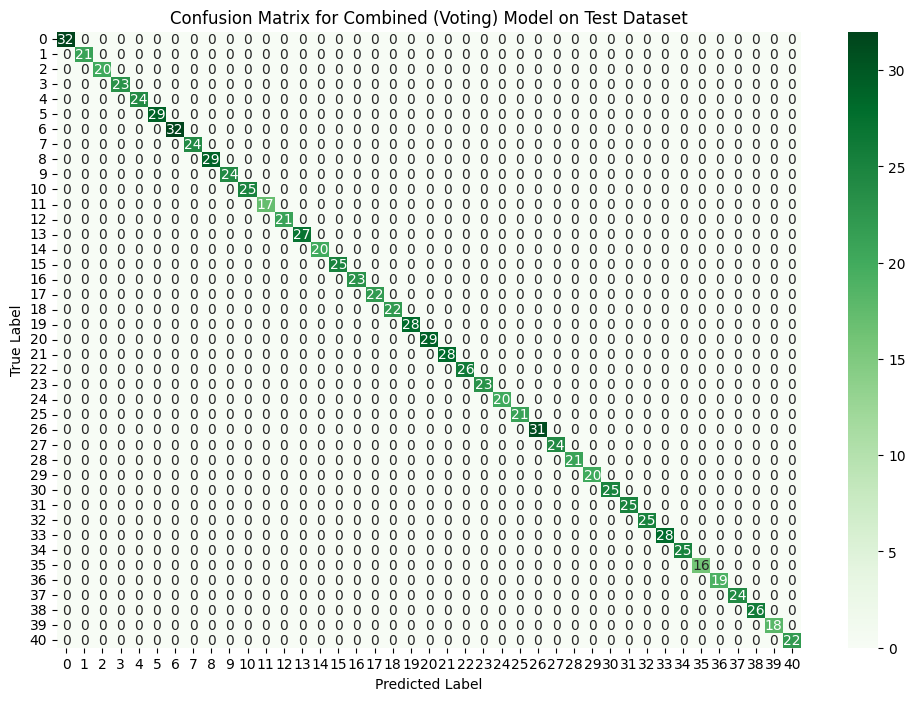

Classification Report for Combined (Voting) Model:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        32
                                   AIDS       1.00      1.00      1.00        21
                                   Acne       1.00      1.00      1.00        20
                    Alcoholic hepatitis       1.00      1.00      1.00        23
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        29
                       Bronchial Asthma       1.00      1.00      1.00        32
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        29
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Cold       1.00      1

In [15]:
cf_matrix = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix for Combined (Voting) Model on Test Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print(f"Classification Report for Combined (Voting) Model:\n{classification_report(y_test, final_preds, target_names=encoder.classes_, zero_division=0)}")

In [16]:
symptoms = X.columns.values
# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}

In [17]:
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        symptom = symptom.strip()  # Remove leading/trailing whitespace
        if symptom in data_dict["symptom_index"]:
            index = data_dict["symptom_index"][symptom]
            input_data[index] = 1
        else:
            print(f"Warning: Symptom '{symptom}' not found in the training data.")
            return "Symptom not recognized"

    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1, -1)

    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
    lr_prediction = data_dict["predictions_classes"][final_lr_model.predict(input_data)[0]]
    dt_prediction = data_dict["predictions_classes"][final_dt_model.predict(input_data)[0]]
    knn_prediction = data_dict["predictions_classes"][final_knn_model.predict(input_data)[0]]
    gb_prediction = data_dict["predictions_classes"][final_gb_model.predict(input_data)[0]]
    ab_prediction = data_dict["predictions_classes"][final_ab_model.predict(input_data)[0]]

    # making final prediction by taking mode of all predictions
    final_prediction = st_mode([rf_prediction, nb_prediction, svm_prediction, lr_prediction, dt_prediction, knn_prediction, gb_prediction, ab_prediction])
    predictions = {
        "random_forest_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "logistic_regression_prediction": lr_prediction,
        "decision_tree_prediction": dt_prediction,
        "k_nearest_neighbors_prediction": knn_prediction,
        "gradient_boosting_prediction": gb_prediction,
        "adaboost_prediction": ab_prediction,
        "final_prediction": final_prediction
    }
    return predictions

# Testing the function
input_symptoms=input("Enter Symptoms: ")
print(predictDisease(input_symptoms))

Enter Symptoms: Itching,Skin Rash,Nodal Skin Eruptions
{'random_forest_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'logistic_regression_prediction': 'Fungal infection', 'decision_tree_prediction': 'Fungal infection', 'k_nearest_neighbors_prediction': 'Fungal infection', 'gradient_boosting_prediction': 'Fungal infection', 'adaboost_prediction': 'Psoriasis', 'final_prediction': 'Fungal infection'}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/u

In [18]:
filename = 'Multiple_disease_prediction_bot_trained_model.sav'
joblib.dump(final_svm_model, open(filename, 'wb'))
joblib.dump(final_nb_model, open(filename, 'wb'))
joblib.dump(final_rf_model, open(filename, 'wb'))
joblib.dump(final_lr_model, open(filename, 'wb'))
joblib.dump(final_dt_model, open(filename, 'wb'))
joblib.dump(final_knn_model, open(filename, 'wb'))
joblib.dump(final_gb_model, open(filename, 'wb'))
joblib.dump(final_ab_model, open(filename, 'wb'))

In [19]:
# # loading the saved model
loaded_model = joblib.load(open('Multiple_disease_prediction_bot_trained_model.sav', 'rb'))